In [1]:
import pandas as pd
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
from ploomber import products
import yaml
import sys
sys.path.append("../")
from functions.pipelineVariables import upstreamList, studyList
from functions.loadPipelineProducts import getProductFromDag, tidyOutputName

In [2]:
t1 = pd.read_parquet("../data/ukb_final.parquet")

In [10]:
import yaml

with open("../pipeline.yaml", "r") as stream:
    try:
        pipelineDag = (yaml.safe_load(stream))
    except yaml.YAMLError as exc:
        print(exc)

targetTask = [x for x in pipelineDag["tasks"]
              if "Compute DASH" in x["name"]][0]["product"]        

print(targetTask)

{'nb': 'output/01_data_processing/0f_dash_score.html', 'data_completeCases_noLowerScore': 'data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_complete_cases_dash.parquet', 'data_completeCases_yesLowerScore': 'data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_lq_complete_cases_dash.parquet', 'data_knnImpute_yesLowerScore': 'data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_lq_knn_impute_dash.parquet', 'data_knnImpute_noLowerScore': 'data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_knn_impute_dash.parquet', 'data_completeCases_pca': 'data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_complete_cases_pca_dash.parquet', 'data_knnImpute_pca': 'data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_knn_impute_pca_dash.parquet'}


In [9]:
studyList

['data_completeCases_noLowerScore',
 'data_completeCases_yesLowerScore',
 'data_knnImpute_yesLowerScore',
 'data_knnImpute_noLowerScore',
 'data_completeCases_pca',
 'data_knnImpute_pca']

In [12]:
targetTask[studyList[0]]

'data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_complete_cases_dash.parquet'

In [9]:
result = pyreadr.read_r("~/UKBB/UKB_preparation_in_progress/extraction_recoding/outputs/dash_diet/ukb_extracted.rds")
dietDf = result[None]

In [10]:
dietDf

,cooked_vegetable_intake.0.0,cooked_vegetable_intake.1.0,raw_vegetable_intake.0.0,raw_vegetable_intake.1.0,fresh_fruit_intake.0.0,fresh_fruit_intake.1.0,dried_fruit_intake.0.0,dried_fruit_intake.1.0,oily_fish_intake.0.0,oily_fish_intake.1.0,...,bread_intake.0.0,bread_intake.1.0,bread_type.0.0,bread_type.1.0,cereal_intake.0.0,cereal_intake.1.0,cereal_type.0.0,cereal_type.1.0,salt_added_to_food.0.0,salt_added_to_food.1.0
0,3,NaN,0,NaN,2,NaN,0,NaN,1,NaN,...,4,NaN,3,NaN,0,NaN,NaN,NaN,3,NaN
1,3,NaN,-10,NaN,-10,NaN,-10,NaN,2,NaN,...,2,NaN,3,NaN,7,NaN,3,NaN,3,NaN
2,4,NaN,0,NaN,1,NaN,0,NaN,1,NaN,...,7,NaN,3,NaN,1,NaN,2,NaN,1,NaN
3,2,1,0,1,2,2,0,1,1,1,...,10,5,3,2,3,2,1,1,2,2
4,4,NaN,3,NaN,5,NaN,2,NaN,3,NaN,...,10,NaN,3,NaN,5,NaN,4,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502456,1,NaN,2,NaN,1,NaN,0,NaN,0,NaN,...,7,NaN,3,NaN,7,NaN,2,NaN,1,NaN
502457,2,NaN,1,NaN,2,NaN,0,NaN,2,NaN,...,30,NaN,3,NaN,7,NaN,5,NaN,1,NaN
502458,3,NaN,0,NaN,1,NaN,0,NaN,1,NaN,...,20,NaN,3,NaN,4,NaN,3,NaN,4,NaN
502459,3,3,1,1,2,3,-10,-10,2,2,...,10,9,3,3,7,7,2,2,1,1


In [27]:

df1 = pd.read_parquet("../data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_complete_cases_dash.parquet")
df2 = pd.read_parquet("../data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_lq_complete_cases_dash.parquet")
df3 = pd.read_parquet("../data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_lq_knn_impute_dash.parquet")
df4 = pd.read_parquet("../data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_knn_impute_dash.parquet")
df5 = pd.read_parquet("../data/processed_data/06_ukbb_outcome_trimmed_diet_bhs_complete_cases_pca_subsystem_dash.parquet")


In [5]:
df1["DASH_SCORE"].value_counts(bins=5, dropna=False)

DASH_SCORE
(18.9, 22.6]      3250
(22.6, 26.3]      2019
(15.2, 18.9]      1333
(26.3, 30.0]       226
(11.481, 15.2]     134
Name: count, dtype: int64

In [11]:
df1.columns[df1.columns.str.contains("protein")]

Index(['total_phospholipids_lipoprotein_NG.0.0',
       'total_phospholipids_lipoprotein_NG.1.0',
       'Total_Lipids_in_Lipoprotein_Particles_NG.0.0',
       'Total_Lipids_in_Lipoprotein_Particles_NG.1.0',
       'Total_Concentration_of_Lipoprotein_Particles_NG.0.0',
       'Total_Concentration_of_Lipoprotein_Particles_NG.1.0',
       'Apolipoprotein_B_NG.0.0', 'Apolipoprotein_B_NG.1.0',
       'Apolipoprotein_A1_NG.0.0', 'Apolipoprotein_A1_NG.1.0',
       'Glycoprotein_Acetyls_NG.0.0', 'Glycoprotein_Acetyls_NG.1.0',
       'apolipoprotein_A.0.0', 'apolipoprotein_A.1.0', 'apolipoprotein_B.0.0',
       'apolipoprotein_B.1.0', 'c.reactive_protein.0.0',
       'c.reactive_protein.1.0', 'lipoprotein_A.0.0', 'lipoprotein_A.1.0',
       'total_protein.0.0', 'total_protein.1.0',
       'c.reactive_protein_score.0.0', 'c.reactive_protein_score.1.0',
       'c.reactive_protein_score_b.1.0',
       'delta_biomarker_c.reactive_protein_score.1.0'],
      dtype='object')

In [12]:
df1["c.reactive_protein_score.0.0"].value_counts(bins=5, dropna=False)

c.reactive_protein_score.0.0
(-0.002, 0.2]    5225
(0.8, 1.0]       1737
(0.2, 0.4]          0
(0.4, 0.6]          0
(0.6, 0.8]          0
Name: count, dtype: int64

In [13]:
df1["IGF1.0.0"].value_counts(bins=5, dropna=False)

IGF1.0.0
(15.466, 26.504]    4952
(26.504, 37.542]    1075
(4.372, 15.466]      889
(37.542, 48.58]       43
(48.58, 59.618]        3
Name: count, dtype: int64

In [4]:
dfList = [df1, df2, df3, df4]

In [5]:
for dfNumb in dfList:
    print(dfNumb.shape)
    print(dfNumb.iloc[:,1:6].tail())

(6962, 1021)
      waist.0.0  waist.1.0  hip.0.0  hip.1.0  height_stand.0.0
6957       65.0       69.0     91.0     98.0             162.0
6958       78.0       74.0     94.0     91.0             158.0
6959       96.0       93.0    105.0    102.0             176.0
6960       97.0      103.0    100.0    101.0             174.0
6961      109.0      106.5    115.0    111.5             178.0
(6962, 1021)
      waist.0.0  waist.1.0  hip.0.0  hip.1.0  height_stand.0.0
6957       65.0       69.0     91.0     98.0             162.0
6958       78.0       74.0     94.0     91.0             158.0
6959       96.0       93.0    105.0    102.0             176.0
6960       97.0      103.0    100.0    101.0             174.0
6961      109.0      106.5    115.0    111.5             178.0
(16847, 1021)
       waist.0.0  waist.1.0  hip.0.0  hip.1.0  height_stand.0.0
16842       93.0       92.0    102.0    100.0             184.0
16843       76.0       86.0    101.0    104.0             171.0
16844       

In [7]:
df5 = pd.read_parquet("../data/processed_data/05_ukbb_outcome_trimmed_diet_bhs_lq_complete_cases.parquet")

In [8]:
df5.shape

(6962, 1020)

In [9]:
df2

,eid,waist.0.0,waist.1.0,hip.0.0,hip.1.0,height_stand.0.0,height_stand.1.0,height_seat.0.0,height_seat.1.0,pulse_rate.0.0,...,delta_biomarker_inflam_score.1.0,delta_biomarker_renal_score.1.0,delta_biomarker_hepato_score.1.0,delta_subsystem_contrib,delta_biomarker_subsystem_contrib,delta_subsystem_contrib_b,delta_bhs,delta_bhs_b,delta_biomarker_bhs,DASH_SCORE
0,1000049,113.0,95.0,99.0,103.5,181.0,181.0,143.0,131.0,64.0,...,0.0,0.0,0.000000,None,delta_biomarker_cardio_score,None,-0.366667,-0.366667,0.066667,NaN
1,1000070,69.0,72.0,90.0,93.0,162.0,161.0,134.0,123.0,78.0,...,0.0,0.0,0.000000,cardio_score,Mixed,cardio_score_b,0.000000,0.000000,-0.066667,NaN
2,1000606,84.0,81.0,108.0,106.0,164.0,163.0,140.0,127.0,49.0,...,0.0,0.0,0.000000,metabol_score,delta_biomarker_metabol_score,renal_score_b,0.050000,0.250000,0.050000,NaN
3,1000612,102.0,99.0,104.0,102.0,174.0,174.0,142.0,131.0,71.0,...,-1.0,-0.5,0.000000,metabol_score,delta_biomarker_hepato_score,metabol_score_b,-0.250000,-0.250000,-0.466667,18.333333
4,1001037,97.0,92.0,101.0,97.0,173.0,172.0,142.0,131.0,65.0,...,0.0,-0.5,-0.333333,metabol_score,Mixed,inflam_score_b,-0.133333,-0.033333,-0.166667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,6022596,93.0,92.0,102.0,100.0,184.0,184.0,141.0,140.0,55.0,...,0.5,0.5,-0.333333,renal_score,Mixed,renal_score_b,0.216667,0.216667,0.250000,NaN
16843,6022966,76.0,86.0,101.0,104.0,171.0,171.0,138.0,128.0,86.0,...,0.0,0.0,0.000000,cardio_score,delta_biomarker_metabol_score,cardio_score_b,-0.050000,-0.050000,0.050000,NaN
16844,6024466,97.0,103.0,100.0,101.0,174.0,172.0,139.0,129.0,68.0,...,-0.5,-0.5,1.000000,hepato_score,delta_biomarker_hepato_score,hepato_score_b,-0.033333,-0.100000,-0.066667,NaN
16845,6024672,109.0,106.5,115.0,111.5,178.0,177.0,145.0,133.0,58.0,...,0.0,0.0,0.666667,Mixed,delta_biomarker_hepato_score,Mixed,0.150000,0.150000,0.150000,NaN


In [10]:
df5

,eid,waist.0.0,waist.1.0,hip.0.0,hip.1.0,height_stand.0.0,height_stand.1.0,height_seat.0.0,height_seat.1.0,pulse_rate.0.0,...,delta_biomarker_cardio_score.1.0,delta_biomarker_inflam_score.1.0,delta_biomarker_renal_score.1.0,delta_biomarker_hepato_score.1.0,delta_subsystem_contrib,delta_biomarker_subsystem_contrib,delta_subsystem_contrib_b,delta_bhs,delta_bhs_b,delta_biomarker_bhs
0,1001043,72.0,79.0,90.0,96.0,158.0,157.0,132.0,123.0,54.0,...,-0.333333,0.0,0.0,-0.666667,inflam_score,Mixed,inflam_score_b,-0.066667,-0.066667,-0.200000
1,1001786,71.0,79.0,90.0,94.0,145.0,149.0,118.0,122.0,70.0,...,0.000000,1.0,-0.5,0.000000,inflam_score,delta_biomarker_inflam_score,inflam_score_b,0.200000,0.200000,0.150000
2,1002061,99.0,94.0,102.0,100.0,179.0,174.0,135.0,128.0,70.0,...,-0.333333,-0.5,0.0,0.000000,metabol_score,delta_biomarker_metabol_score,Mixed,0.000000,0.100000,-0.016667
3,1002553,74.0,90.0,95.0,106.0,162.0,160.0,139.0,126.0,64.0,...,0.333333,0.0,0.0,0.000000,inflam_score,delta_biomarker_cardio_score,metabol_score_b,0.050000,-0.050000,0.066667
4,1002908,120.0,108.0,115.0,110.0,178.0,174.0,131.0,124.0,91.0,...,0.333333,-1.0,1.0,0.333333,metabol_score,delta_biomarker_renal_score,metabol_score_b,0.166667,0.166667,0.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,6021727,65.0,69.0,91.0,98.0,162.0,161.0,128.0,128.0,60.0,...,0.000000,0.0,-0.5,-0.666667,inflam_score,Mixed,metabol_score_b,0.000000,-0.100000,-0.283333
6958,6021938,78.0,74.0,94.0,91.0,158.0,157.0,136.0,126.0,70.0,...,-1.000000,0.5,0.0,-0.333333,None,delta_biomarker_inflam_score,None,0.000000,0.000000,-0.166667
6959,6022185,96.0,93.0,105.0,102.0,176.0,174.0,143.0,132.0,75.0,...,0.666667,0.0,-1.0,0.333333,cardio_score,delta_biomarker_cardio_score,cardio_score_b,0.016667,0.016667,-0.050000
6960,6024466,97.0,103.0,100.0,101.0,174.0,172.0,139.0,129.0,68.0,...,-0.333333,-0.5,-0.5,1.000000,hepato_score,delta_biomarker_hepato_score,hepato_score_b,-0.033333,-0.100000,-0.016667


In [6]:
df1["DASH_SCORE"].value_counts(dropna=False)

22.000000    97
21.500000    82
21.000000    75
24.000000    74
21.750000    73
             ..
18.283333     1
28.166667     1
21.233333     1
14.650000     1
18.816667     1
Name: DASH_SCORE, Length: 711, dtype: int64

<Figure size 640x480 with 0 Axes>

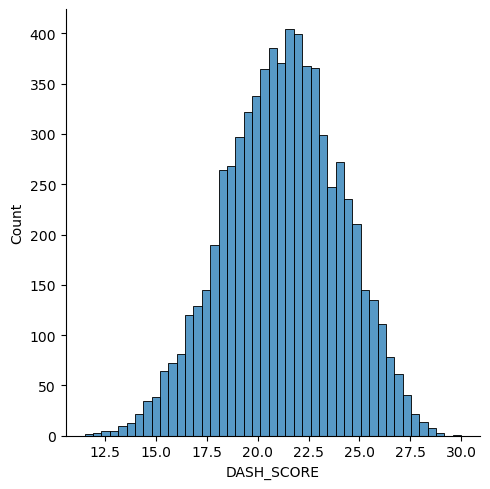

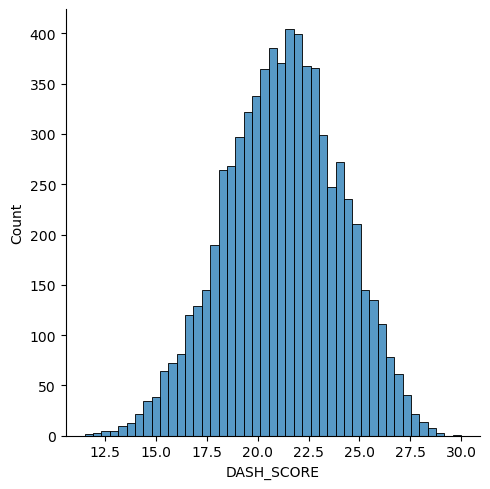

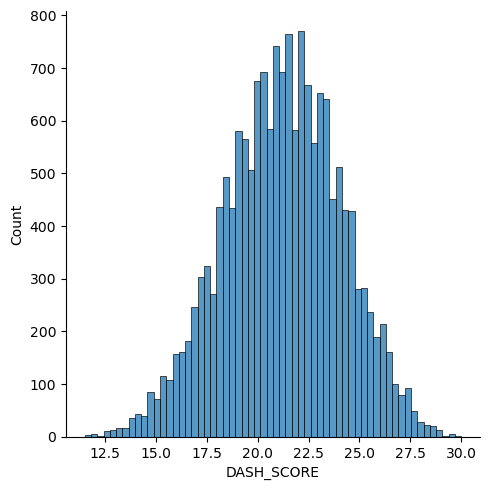

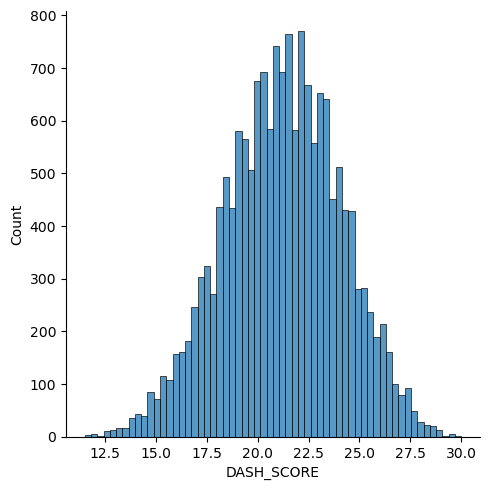

In [15]:
for i, dfNumb in enumerate(dfList):
    plt.figure(i)
    sns.displot(dfNumb["DASH_SCORE"])

In [17]:
####
#
# checking diagnosis and cases numbers with knn vs complete cases
# make sure confidence intervals makes sense
# seems to match up across different bhs types 
# keep this as need ot check with table 1
#
####

def checkDiagnosisCounts(inputDf, studyName):
    for outcomeType in ["Cancer", "Cad", "CVD"]:
#         print(inputDf[f"ttd{outcomeType}"].value_counts())
        print(f"{studyName} - {outcomeType.upper()}")
        print(inputDf[f"case{outcomeType}"].value_counts())
        print("\n")
               
# edit to account for notebook location
for studyType, studyName in zip(studyList, upstreamList):
    df = pd.read_parquet(f"../{targetTask[studyType]}")
    checkDiagnosisCounts(df, studyName)

Calculate BHS (Complete Cases) - CANCER
caseCancer
0.0    5461
1.0    1501
Name: count, dtype: int64


Calculate BHS (Complete Cases) - CAD
caseCad
0.0    6484
1.0     478
Name: count, dtype: int64


Calculate BHS (Complete Cases) - CVD
caseCVD
0.0    6216
1.0     746
Name: count, dtype: int64


Calculate BHS (Complete Cases n Lower Quartile Scored) - CANCER
caseCancer
0.0    5461
1.0    1501
Name: count, dtype: int64


Calculate BHS (Complete Cases n Lower Quartile Scored) - CAD
caseCad
0.0    6484
1.0     478
Name: count, dtype: int64


Calculate BHS (Complete Cases n Lower Quartile Scored) - CVD
caseCVD
0.0    6216
1.0     746
Name: count, dtype: int64


Calculate BHS (KNN Impute n Lower Quartile Scored) - CANCER
caseCancer
0.0    13211
1.0     3636
Name: count, dtype: int64


Calculate BHS (KNN Impute n Lower Quartile Scored) - CAD
caseCad
0.0    15742
1.0     1105
Name: count, dtype: int64


Calculate BHS (KNN Impute n Lower Quartile Scored) - CVD
caseCVD
0.0    15062
1.0     1785

In [28]:
df1["delta_biomarker_bhs"].value_counts(bins=5, dropna=False)

delta_biomarker_bhs
(0.17, 0.34]        2628
(-0.00185, 0.17]    2597
(0.34, 0.51]        1286
(0.51, 0.68]         390
(0.68, 0.85]          61
Name: count, dtype: int64

In [29]:
df5["delta_biomarker_bhs"].value_counts(bins=5, dropna=False)

delta_biomarker_bhs
(-0.301, 1.594]                  5106
(-2.195, -0.301]                 1772
(1.594, 3.488]                     68
(-4.1000000000000005, -2.195]      12
(3.488, 5.382]                      4
Name: count, dtype: int64

In [30]:
df1["delta_biomarker_bhs"]

0       0.150000
1       0.316667
2       0.316667
3       0.166667
4       0.500000
          ...   
6957    0.000000
6958    0.150000
6959    0.250000
6960    0.250000
6961    0.300000
Name: delta_biomarker_bhs, Length: 6962, dtype: float64

In [31]:
df5["delta_biomarker_bhs"]

0      -0.315557
1      -0.087751
2      -0.158144
3      -0.090567
4       0.997642
          ...   
6957   -0.192029
6958    0.415608
6959    0.589769
6960    0.522014
6961   -0.285707
Name: delta_biomarker_bhs, Length: 6962, dtype: float64

In [14]:
systemNameList = ["metabol", "cardio", "inflam", "renal", "hepato"]
df5[["delta_biomarker_"+x+"_score.1.0" for x in systemNameList]]

# df5[["delta_biomarker_cardio_score", "delta_biomarker_bhs"]]

,delta_biomarker_metabol_score.1.0,delta_biomarker_cardio_score.1.0,delta_biomarker_inflam_score.1.0,delta_biomarker_renal_score.1.0,delta_biomarker_hepato_score.1.0
0,0.25,0.000000,0.5,0.0,0.000000
1,0.25,0.333333,1.0,0.0,0.000000
2,0.75,0.333333,0.0,0.5,0.000000
3,0.50,0.333333,0.0,0.0,0.000000
4,0.50,0.666667,0.0,1.0,0.333333
...,...,...,...,...,...
6957,0.00,0.000000,0.0,0.0,0.000000
6958,0.25,0.000000,0.5,0.0,0.000000
6959,0.25,0.666667,0.0,0.0,0.333333
6960,0.25,0.000000,0.0,0.0,1.000000


In [15]:
df1[["delta_biomarker_"+x+"_score.1.0" for x in systemNameList]]

,delta_biomarker_metabol_score.1.0,delta_biomarker_cardio_score.1.0,delta_biomarker_inflam_score.1.0,delta_biomarker_renal_score.1.0,delta_biomarker_hepato_score.1.0
0,0.25,0.000000,0.5,0.0,0.000000
1,0.25,0.333333,1.0,0.0,0.000000
2,0.75,0.333333,0.0,0.5,0.000000
3,0.50,0.333333,0.0,0.0,0.000000
4,0.50,0.666667,0.0,1.0,0.333333
...,...,...,...,...,...
6957,0.00,0.000000,0.0,0.0,0.000000
6958,0.25,0.000000,0.5,0.0,0.000000
6959,0.25,0.666667,0.0,0.0,0.333333
6960,0.25,0.000000,0.0,0.0,1.000000


In [16]:
df5.columns[df5.columns.str.contains("delta")]

Index(['delta_biomarker_glycated_haemoglobin_score.1.0',
       'delta_biomarker_HDL_cholesterol_score.1.0',
       'delta_biomarker_LDL_direct_score.1.0',
       'delta_biomarker_triglycerides_score.1.0',
       'delta_biomarker_systolic_bp_score.1.0',
       'delta_biomarker_diastolic_bp_score.1.0',
       'delta_biomarker_pulse_rate_score.1.0',
       'delta_biomarker_c.reactive_protein_score.1.0',
       'delta_biomarker_IGF1_score.1.0',
       'delta_biomarker_creatinine_score.1.0',
       'delta_biomarker_cystatin_C_score.1.0',
       'delta_biomarker_alanine_aminotransferase_score.1.0',
       'delta_biomarker_aspartate_aminotransferase_score.1.0',
       'delta_biomarker_gamma_glutamyltransferase_score.1.0',
       'delta_biomarker_metabol_score.1.0', 'delta_biomarker_cardio_score.1.0',
       'delta_biomarker_inflam_score.1.0', 'delta_biomarker_renal_score.1.0',
       'delta_biomarker_hepato_score.1.0', 'delta_subsystem_contrib',
       'delta_biomarker_subsystem_contrib', 'd

In [18]:
df5.loc[:,df5.columns.str.contains("delta")]

,delta_biomarker_glycated_haemoglobin_score.1.0,delta_biomarker_HDL_cholesterol_score.1.0,delta_biomarker_LDL_direct_score.1.0,delta_biomarker_triglycerides_score.1.0,delta_biomarker_systolic_bp_score.1.0,delta_biomarker_diastolic_bp_score.1.0,delta_biomarker_pulse_rate_score.1.0,delta_biomarker_c.reactive_protein_score.1.0,delta_biomarker_IGF1_score.1.0,delta_biomarker_creatinine_score.1.0,...,delta_biomarker_cardio_score.1.0,delta_biomarker_inflam_score.1.0,delta_biomarker_renal_score.1.0,delta_biomarker_hepato_score.1.0,delta_subsystem_contrib,delta_biomarker_subsystem_contrib,delta_subsystem_contrib_b,delta_bhs,delta_bhs_b,delta_biomarker_bhs
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.5,0.0,0.000000,None,delta_biomarker_inflam_score,inflam_score_b,-0.166667,-0.066667,0.150000
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.333333,1.0,0.0,0.000000,inflam_score,delta_biomarker_inflam_score,inflam_score_b,0.200000,0.200000,0.316667
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.333333,0.0,0.5,0.000000,metabol_score,delta_biomarker_metabol_score,Mixed,0.000000,0.100000,0.316667
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.000000,inflam_score,delta_biomarker_metabol_score,metabol_score_b,0.050000,-0.050000,0.166667
4,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.666667,0.0,1.0,0.333333,metabol_score,delta_biomarker_renal_score,metabol_score_b,0.166667,0.166667,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,inflam_score,None,metabol_score_b,0.000000,-0.100000,0.000000
6958,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.5,0.0,0.000000,None,delta_biomarker_inflam_score,None,0.000000,0.000000,0.150000
6959,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.666667,0.0,0.0,0.333333,cardio_score,delta_biomarker_cardio_score,cardio_score_b,0.016667,0.016667,0.250000
6960,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.000000,hepato_score,delta_biomarker_hepato_score,hepato_score_b,-0.033333,-0.100000,0.250000


In [21]:
continuous_pca_biomarker = False
continuous_pca_subsystem = True

In [24]:
continuous_pca_biomarker or continuous_pca_subsystem is False

False

In [25]:
continuous_pca_biomarker is False or continuous_pca_subsystem is False

True

In [26]:
continuous_pca_biomarker is False and continuous_pca_subsystem is False

False